## Observations and Insights 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_metadata.head()
#study_results.head()
# the only common column is "Mouse ID"
mergeDF = pd.merge(mouse_metadata, study_results, on="Mouse ID") # merge
mergeDF = mergeDF.sort_values(["Mouse ID", "Timepoint"], ascending=True) # pre clean
mergeDF = mergeDF.reset_index(drop=True) # change up the index numbers so it starts at 0 instead of 400 something

# Display the data table for preview
mergeDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [64]:
# Checking the number of mice, AKA the number of unique Mouse IDs
mouseIDDF = mergeDF.drop_duplicates(subset = "Mouse ID", keep = 'first', inplace = False)
# looks at the column Mouse ID and keeps only the first of every individual value
#mouseIDDF.head()
len(mouseIDDF) # there are 249 individual mice

249

In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepointDupeDF = mergeDF[
    mergeDF.duplicated(
        #subset = ["Mouse ID", "Timepoint"],
        keep='first'
    )
]
timepointDupeDF
#print(mergeDF.loc[586])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.0,0


In [66]:
# Optional: Get all the data for the duplicate mouse ID. 
mergeDF.loc[mergeDF["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mergeDF = mergeDF[mergeDF["Mouse ID"] != "g989"]
# validate that the data with this Mouse ID has been removed
#mergeDF.loc[mergeDF["Mouse ID"]=="g989",:]

In [68]:
# Checking the number of mice in the clean DataFrame.
mouseIDCleanDF = mergeDF.drop_duplicates(subset = "Mouse ID", keep = 'first', inplace = False)
len(mouseIDCleanDF) # there are 248 individual mice in the (cleaned) data set now

248

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# find the names of the regimens
regimenDF = mergeDF.drop_duplicates(subset = "Drug Regimen", keep = 'first', inplace = False)

# the names of the regimens are as follows:
# "Infubinol",
# "Placebo",
# "Ceftamin",
# "Stelasyn",
# "Zoniferol",
# "Ramicane",
# "Ketapril",
# "Propriva",
# "Capomulin",

# infubinolStatDF = mergeDF.loc[mergeDF["Drug Regimen"]=="Infubinol", :]
# infubinolStatDF.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drugMeanDF = mergeDF.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drugMedianDF = mergeDF.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drugVarianceDF = mergeDF.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drugStdDevDF = mergeDF.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drugSEMDF = mergeDF.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summDF = pd.DataFrame({
    "Drug Regimen": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
    "Mean of Tumor Volume (mm3)": [drugMeanDF[0], drugMeanDF[1], drugMeanDF[2], drugMeanDF[3], drugMeanDF[4], drugMeanDF[5], drugMeanDF[6], drugMeanDF[7], drugMeanDF[8], drugMeanDF[9]],
    "Median of Tumor Volume (mm3)": [drugMedianDF[0], drugMedianDF[1], drugMedianDF[2], drugMedianDF[3], drugMedianDF[4], drugMedianDF[5], drugMedianDF[6], drugMedianDF[7], drugMedianDF[8], drugMedianDF[9]],
    "Variance of Tumor Volume (mm3)": [drugVarianceDF[0], drugVarianceDF[1], drugVarianceDF[2], drugVarianceDF[3], drugVarianceDF[4], drugVarianceDF[5], drugVarianceDF[6], drugVarianceDF[7], drugVarianceDF[8], drugVarianceDF[9]],
    "Standard Deviation of Tumor Volume (mm3)": [drugStdDevDF[0], drugStdDevDF[1], drugStdDevDF[2], drugStdDevDF[3], drugStdDevDF[4], drugStdDevDF[5], drugStdDevDF[6], drugStdDevDF[7], drugStdDevDF[8], drugStdDevDF[9]],
    "Standard Error of the Mean of Tumor Volume (mm3)": [drugSEMDF[0], drugSEMDF[1], drugSEMDF[2], drugSEMDF[3], drugSEMDF[4], drugSEMDF[5], drugSEMDF[6], drugSEMDF[7], drugSEMDF[8], drugSEMDF[9]],
})
summDF

,Drug Regimen,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of the Mean of Tumor Volume (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# didn't I just do this?
summDF

# Using the aggregation method, produce the same summary statistics in a single line
aggSummDF = mergeDF.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
aggSummDF
# numbers match up
# that's a good sign lol

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Total Number of Timepoints for All Mice Tested'>

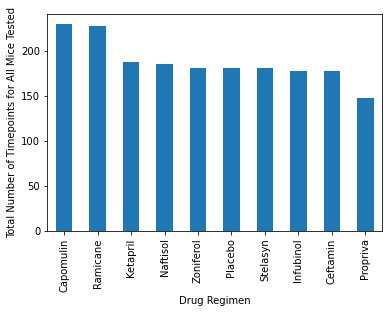

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# the x axis should be the Mouse ID
# the y axis should be the total number of time points for that Mouse ID

#xAxis = mergeDF.drop_duplicates(subset = "Mouse ID", keep = 'first', inplace = False)["Mouse ID"]
#yAxis = mergeDF["Mouse ID"].count()
#mergeDF.plot.bar(x = xAxis, y = yAxis)

regCounts = mergeDF["Drug Regimen"].value_counts()
regCounts.plot(kind = "bar", xlabel = "Drug Regimen", ylabel = "Total Number of Timepoints for All Mice Tested")

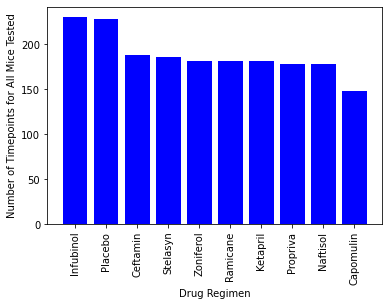

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = regimenDF["Drug Regimen"]
y = mergeDF["Drug Regimen"].value_counts()
plt.bar(x, y, color="b")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Timepoints for All Mice Tested")
plt.show()

<AxesSubplot:ylabel='Sex'>

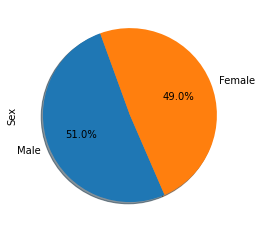

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderPerc = mergeDF["Sex"].value_counts()
genderPerc.plot(kind="pie", autopct="%1.1f%%", shadow=True, startangle=110)

([<matplotlib.patches.Wedge at 0x7fcea9eb3580>,
 [Text(-1.0995024239828841, -0.03308201408261565, 'Male'),
  Text(1.0995024239828841, 0.033082014082615026, 'Female')],
 [Text(-0.5997285948997549, -0.018044734954153988, '51.0%'),
  Text(0.5997285948997549, 0.018044734954153648, '49.0%')])

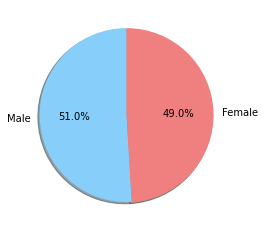

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
genderPerc = mergeDF["Sex"].value_counts()
colors = ["lightskyblue", "lightcoral"]
plt.pie(genderPerc, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)


## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
lastTimepointDF = mergeDF.loc[(mergeDF["Drug Regimen"]=="Capomulin")|(mergeDF["Drug Regimen"]=="Ramicane")|(mergeDF["Drug Regimen"]=="Infubinol")|(mergeDF["Drug Regimen"]=="Ceftamin"),:]
#lastTimepointDF
# Start by getting the last (greatest) timepoint for each mouse
lastTimepointDF = lastTimepointDF.drop_duplicates(subset = "Mouse ID", keep = 'last', inplace = False)
lastTimepointDF = lastTimepointDF.reset_index(drop=True)
lastTimepointDF
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#lastTimepointDF["Tumor Volume (mm3)"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [76]:
lastTimepointDF["Drug Regimen"]

0     Infubinol
1     Infubinol
2      Ceftamin
3      Ramicane
4      Ramicane
        ...    
95     Ceftamin
96    Capomulin
97     Ceftamin
98     Ramicane
99    Infubinol
Name: Drug Regimen, Length: 100, dtype: object

In [77]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = lastTimepointDF.loc[lastTimepointDF["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumorVols.append(tumorVol)
    quartiles = tumorVol.quantile([.25, .5, .75])
 
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # add subset
    outliers = tumorVol.loc[(tumorVol>upper_bound)|(tumorVol<lower_bound)]

    # Determine outliers using upper and lower bounds
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"{treatment}'s potential outliers: {outliers}")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


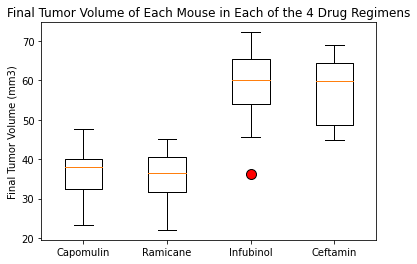

In [78]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse in Each of the 4 Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
flyRed = {'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'}
ax1.boxplot(tumorVols, labels = treatments, flierprops=flyRed)
plt.show()

## Line and Scatter Plots

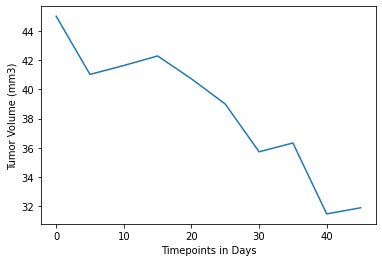

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# pick a mouse from Capomulin - y793
y793DF = mergeDF.loc[mergeDF["Mouse ID"]=="y793",:]
#y793DF
x = y793DF["Timepoint"]
y = y793DF["Tumor Volume (mm3)"]
plt.xlabel("Timepoints in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x,y)
plt.show()

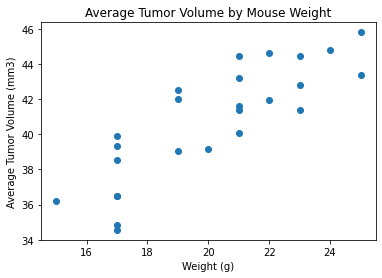

In [80]:
capoDF = mergeDF[mergeDF["Drug Regimen"] == "Capomulin"]
grCapoDF = capoDF.groupby("Mouse ID")
xaxis = (grCapoDF["Weight (g)"].mean())
yaxis = (grCapoDF["Tumor Volume (mm3)"].mean())
plt.scatter(xaxis, yaxis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Mouse Weight")
plt.show()

## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xaxis, yaxis)
print(f"The correlation between mouse weight and average tumor volume is {rvalue}.")

The correlation between mouse weight and average tumor volume is 0.8419363424694721.


The r-squared is: 0.7088568047708723


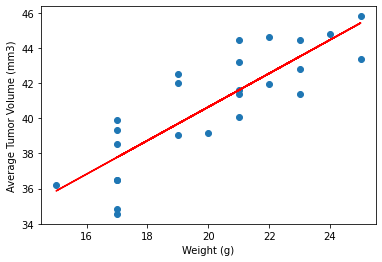

In [87]:
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()